# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/Users/spidy/Downloads/Frequentist Case Study-2/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

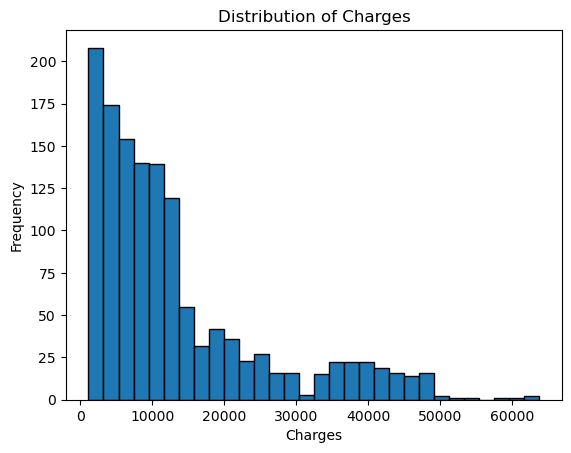

In [6]:
# Plot the histogram of charges
plt.hist(medical['charges'], bins=30, edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()



In [7]:
# Calculate the mean and standard deviation
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

print(f"Mean of charges: {mean_charges}")
print(f"Standard deviation of charges: {std_charges}")

Mean of charges: 13270.422265141257
Standard deviation of charges: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

To address the administrator's concern, we can use a one-sample t-test to determine if the mean charge is significantly less than 12,000. The t-test is appropriate here because we are comparing the sample mean (`mean_charges`) to a known value (12,000) and the population standard deviation is unknown. The Central Limit Theorem justifies the use of this test, as the sample size (n=1338) is sufficiently large for the sampling distribution of the mean to approximate a normal distribution.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [8]:
# Sample size
n = len(medical)

# Degrees of freedom
df = n - 1

In [9]:
# Significance level for one-sided test
alpha = 0.05

# Critical value from t-distribution
t_critical = t.ppf(1 - alpha, df)

# Margin of error
margin_of_error = t_critical * (std_charges / np.sqrt(n))

In [10]:
# One-sided confidence interval
lower_bound = mean_charges - margin_of_error

print(f"Critical value (t): {t_critical}")
print(f"Lower bound of the 95% one-sided confidence interval: {lower_bound}")

Critical value (t): 1.6459941145571317
Lower bound of the 95% one-sided confidence interval: 12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

 * This section involves hypothesis testing to determine whether there is a significant difference 
 * in the charges for people with insurance compared to those without insurance. The test used is 
 * a two-sample t-test for the difference between means, assuming equal variances.
 * 
 * Null Hypothesis (H0): There is no difference in the mean charges between people with insurance 
 * and those without insurance. Mathematically, H0: μ0 = μ1.
 * 
 * Alternative Hypothesis (H1): There is a difference in the mean charges between people with 
 * insurance and those without insurance. Mathematically, H1: μ0 ≠ μ1.
 * 
 * The pooled standard deviation (sp) is calculated using the formula:
 * sp = sqrt(((n0 - 1) * s0^2 + (n1 - 1) * s1^2) / (n0 + n1 - 2))
 * 
 * The t-test statistic is then computed as:
 * t = (x̄0 - x̄1) / (sp * sqrt(1/n0 + 1/n1))
 * 
 * Assumption:
 * - The variances of the two groups (with insurance and without insurance) are assumed to be equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [11]:
from scipy.stats import ttest_ind

# Separate charges for people with and without insurance
charges_with_insurance = medical[medical['insuranceclaim'] == 1]['charges']
charges_without_insurance = medical[medical['insuranceclaim'] == 0]['charges']


In [12]:
# Sample sizes
n0 = len(charges_without_insurance)
n1 = len(charges_with_insurance)

# Sample means
mean0 = charges_without_insurance.mean()
mean1 = charges_with_insurance.mean()

In [13]:
# Sample standard deviations
std0 = charges_without_insurance.std()
std1 = charges_with_insurance.std()

# Pooled standard deviation
sp = np.sqrt(((n0 - 1) * std0**2 + (n1 - 1) * std1**2) / (n0 + n1 - 2))

# Test statistic
t_statistic = (mean0 - mean1) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

In [14]:
# Two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

print(f"Manual calculation - t-statistic: {t_statistic}, p-value: {p_value}")

# Using scipy.stats

t_stat, p_val = ttest_ind(charges_without_insurance, charges_with_insurance, equal_var=True)

print(f"scipy.stats - t-statistic: {t_stat}, p-value: {p_val}")

Manual calculation - t-statistic: -11.893299030876715, p-value: 0.0
scipy.stats - t-statistic: -11.893299030876712, p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

# Documentation Comment:
# __Q6:__ 
# Scipy's `scipy.stats` module does not provide a direct function for performing a *z*-test from a sample, unlike the _t_-test which is available through `scipy.stats.ttest_1samp` and related functions. 
# The absence of a dedicated *z*-test function is likely because *z*-tests are less commonly used in practice compared to _t_-tests, as they require the population standard deviation to be known, which is often not the case in real-world scenarios. 
# However, a *z*-test can still be implemented manually by calculating the z-score using the formula:
# z = (sample_mean - population_mean) / (population_std / sqrt(sample_size))
# and then using the standard normal distribution (e.g., `scipy.stats.norm`) to compute the p-value or critical values as needed.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test